In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:\\Users\\KUSHAGRA\\Downloads\\FRDATA_NOTCAT_ONEHOT_UNSCALED.csv')

In [5]:
data.head()

,Unnamed: 0,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy
0,0,26,52,38,37,0,0,0,0,0,0,1
1,1,29,52,45,12,0,36,0,0,1,0,0
2,2,34,65,62,7,9,30,1,0,0,0,0
3,3,32,62,34,22,0,20,0,0,0,1,0
4,4,28,54,46,35,0,0,0,1,0,0,0


In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  99 non-null     int64
 1   Humidity     99 non-null     int64
 2   Moisture     99 non-null     int64
 3   Nitrogen     99 non-null     int64
 4   Potassium    99 non-null     int64
 5   Phosphorous  99 non-null     int64
 6   Black        99 non-null     int64
 7   Clayey       99 non-null     int64
 8   Loamy        99 non-null     int64
 9   Red          99 non-null     int64
 10  Sandy        99 non-null     int64
dtypes: int64(11)
memory usage: 8.6 KB


In [8]:
fert = pd.read_csv('C:\\Users\\KUSHAGRA\\Downloads\\Fertilizer Name.csv')

In [12]:
fert.drop(columns=['Unnamed: 0'],inplace=True)
fert

,Fertilizer Name
0,Urea
1,DAP
2,14-35-14
3,28-28
4,Urea
...,...
94,28-28
95,10-26-26
96,Urea
97,DAP


In [13]:
data = pd.concat([data,fert],axis=1)
data

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy,Fertilizer Name
0,26,52,38,37,0,0,0,0,0,0,1,Urea
1,29,52,45,12,0,36,0,0,1,0,0,DAP
2,34,65,62,7,9,30,1,0,0,0,0,14-35-14
3,32,62,34,22,0,20,0,0,0,1,0,28-28
4,28,54,46,35,0,0,0,1,0,0,0,Urea
...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,0,28-28
95,30,60,27,4,17,17,0,0,0,1,0,10-26-26
96,38,72,51,39,0,0,0,0,1,0,0,Urea
97,36,60,43,15,0,41,0,0,0,0,1,DAP


In [17]:
from sklearn.utils import resample
data_upsample = resample(data,replace=True,n_samples=1000,random_state=44)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[data.columns[:-1]],data[data.columns[-1]],test_size=0.25,random_state=4)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2,random_state=5)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(data_upsample[data_upsample.columns[:-1]],data_upsample[data_upsample.columns[-1]],test_size=0.25,random_state=4)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2,random_state=5)

In [23]:
print(Xtrain.shape)
print(Xtest.shape)
print(Xval.shape)
print(Ytrain.shape)
print(Ytest.shape)
print(Yval.shape)

(59, 11)
(25, 11)
(15, 11)
(59,)
(25,)
(15,)


In [25]:
print(xtrain.shape)
print(xtest.shape)
print(xval.shape)
print(ytrain.shape)
print(ytest.shape)
print(yval.shape)

(600, 11)
(250, 11)
(150, 11)
(600,)
(250,)
(150,)


In [22]:
np.unique(data['Fertilizer Name'])

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0,

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Best Estimator: KNeighborsClassifier(n_neighbors=8)
Best Parameters: {'n_neighbors': 8}
Best Score0.7823232323232323


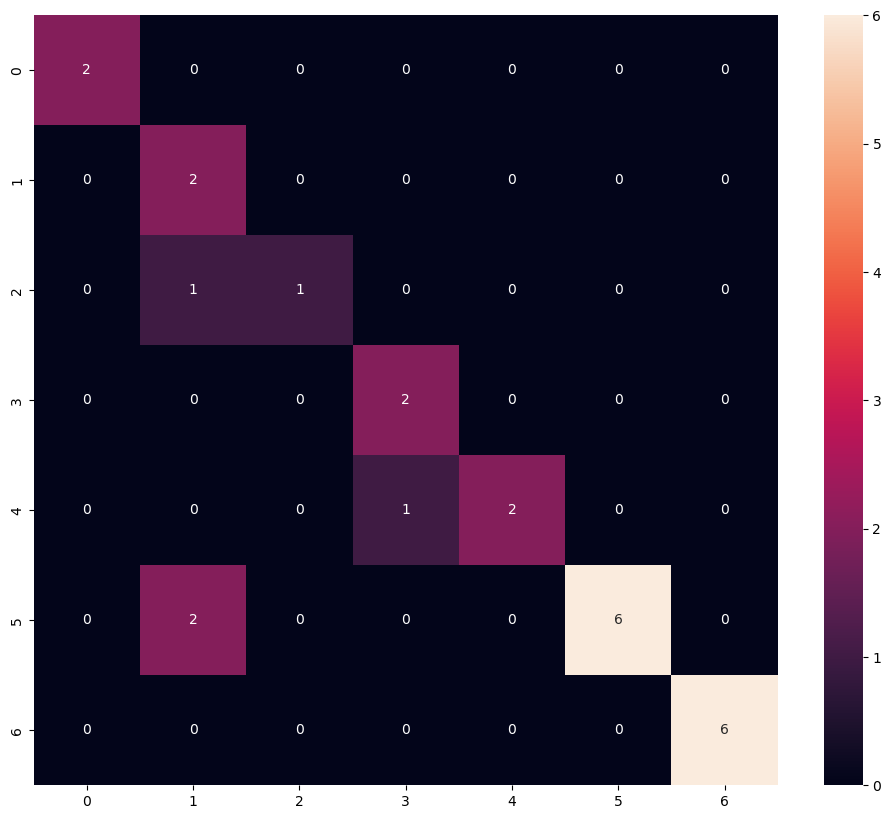

Test accuracy: 0.84
Test F1 score: 0.8533333333333333
Val accuracy: 0.8666666666666667
Val F1 score: 0.8666666666666667


C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_neighbors':[5,6,7,8]}]
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Best Estimator: KNeighborsClassifier()
Best Parameters: {'n_neighbors': 5}
Best Score1.0


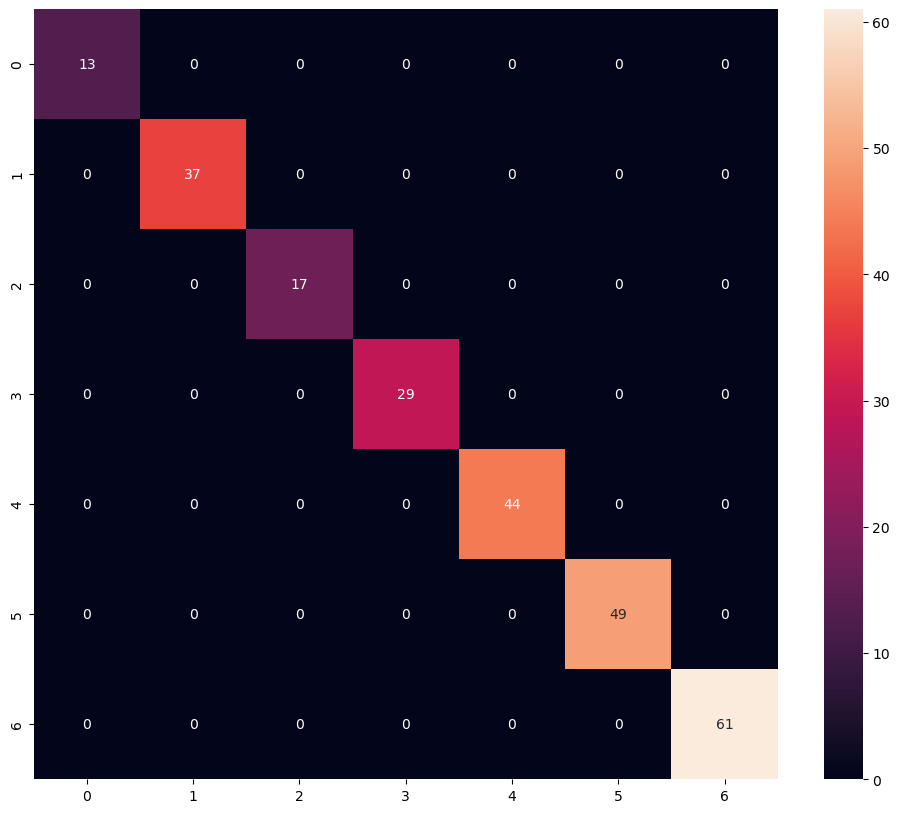

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_neighbors':[5,6,7,8]}]
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: SVC(kernel='linear')
Best Parameters: {'C': 1.0, 'kernel': 'linear'}
Best Score0.9777777777777779


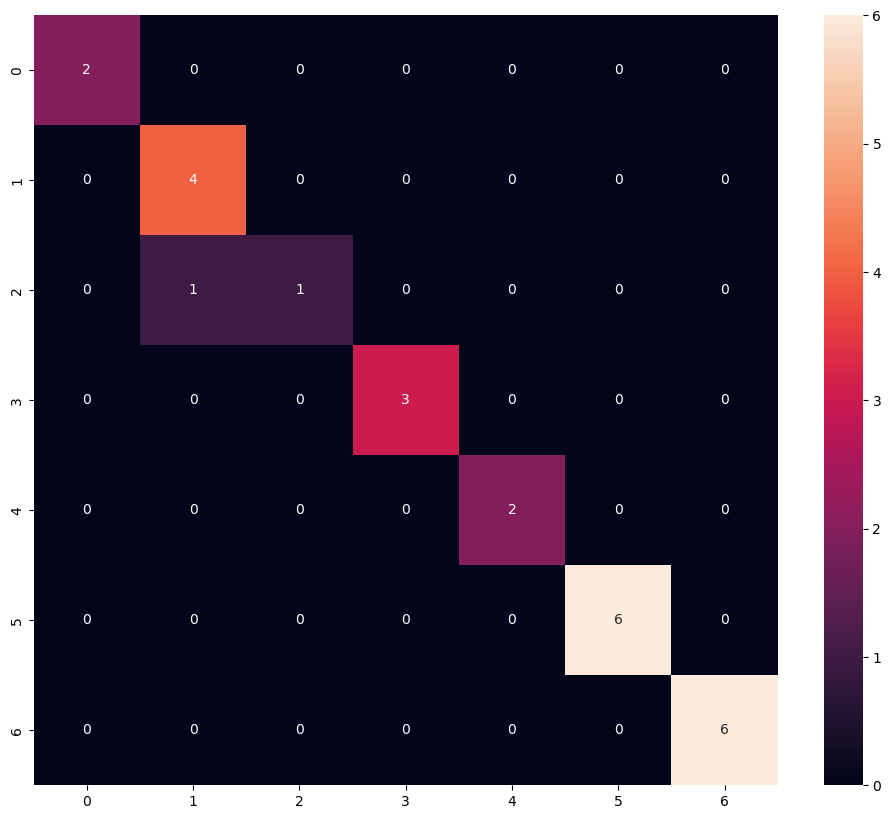

Test accuracy: 0.96
Test F1 score: 0.9555555555555556
Val accuracy: 1.0
Val F1 score: 1.0


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'kernel':['linear','rbf','poly'],'C':[1.0,1.5,2.0]}]
svm = SVC()
gscv = GridSearchCV(svm,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: SVC(C=1.5, kernel='poly')
Best Parameters: {'C': 1.5, 'kernel': 'poly'}
Best Score: 1.0


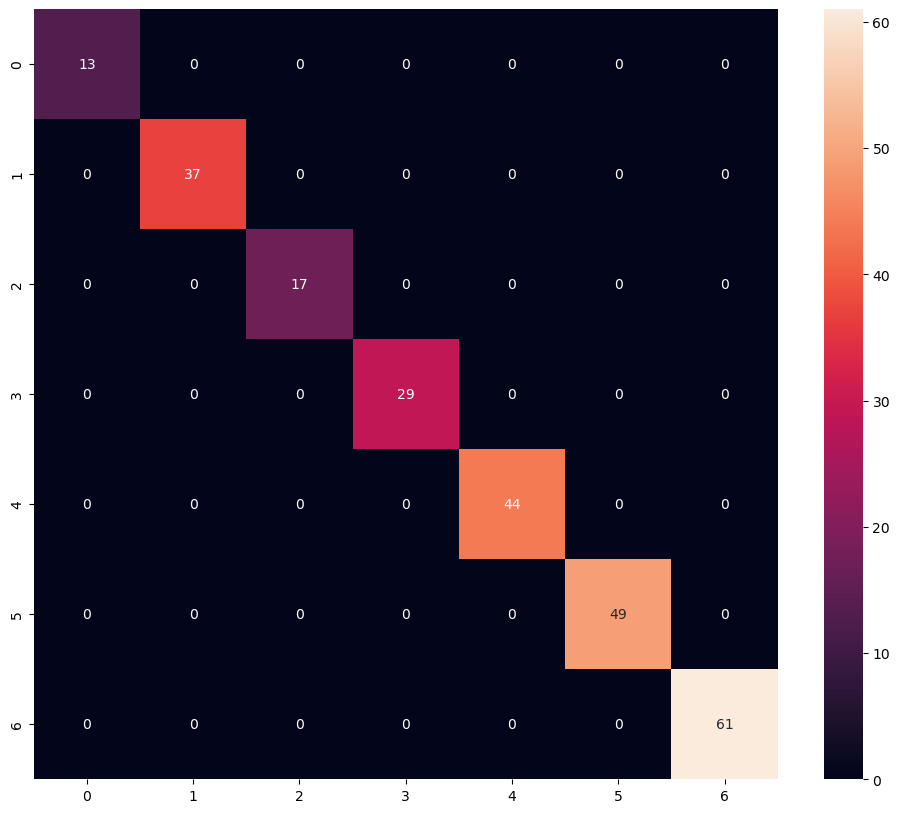

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'kernel':['linear','rbf','poly'],'C':[1.0,1.5,2.0]}]
svm = SVC()
gscv = GridSearchCV(svm,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score: "+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: DecisionTreeClassifier(ccp_alpha=0.1, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='auto')
Best Parameters: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 4}
Best Score0.6603607503607504


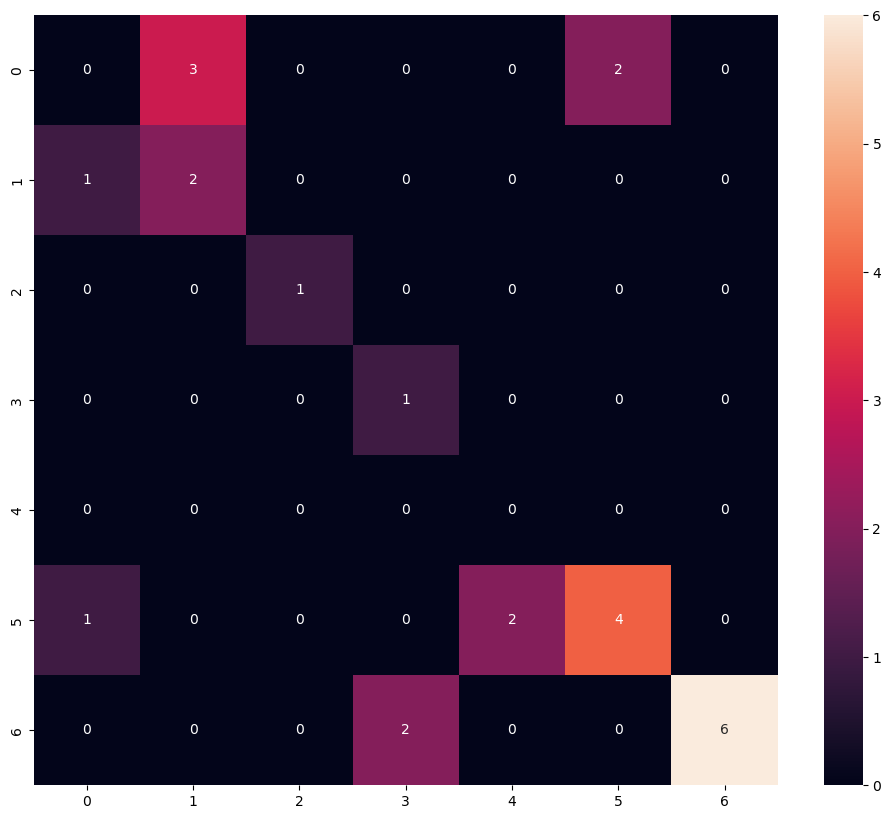

Test accuracy: 0.56
Test F1 score: 0.5665934065934066
Val accuracy: 0.3333333333333333
Val F1 score: 0.4015873015873016


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'criterion':['gini','entropy'],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25]}]
dt = DecisionTreeClassifier(max_features='auto',class_weight='balanced')
gscv = GridSearchCV(dt,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: DecisionTreeClassifier(ccp_alpha=0.1, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='auto')
Best Parameters: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 4}
Best Score0.5961418682802682


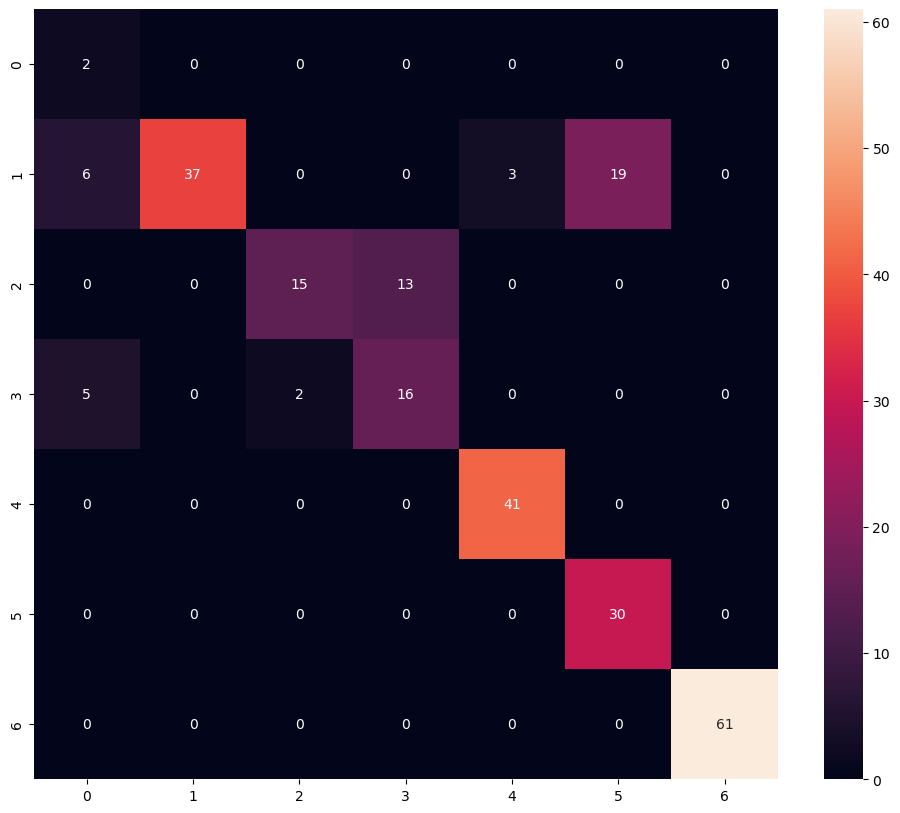

Test accuracy: 0.808
Test F1 score: 0.8153938408079883
Val accuracy: 0.86
Val F1 score: 0.8595014887551474


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'criterion':['gini','entropy'],'max_depth':[2,3,4],'ccp_alpha':[0.1]}]
dt = DecisionTreeClassifier(max_features='auto',class_weight='balanced')
gscv = GridSearchCV(dt,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: RandomForestClassifier(ccp_alpha=0.1, class_weight='balanced', max_depth=2,
                       max_features='sqrt')
Best Parameters: {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'max_depth': 2, 'n_estimators': 100}
Best Score1.0


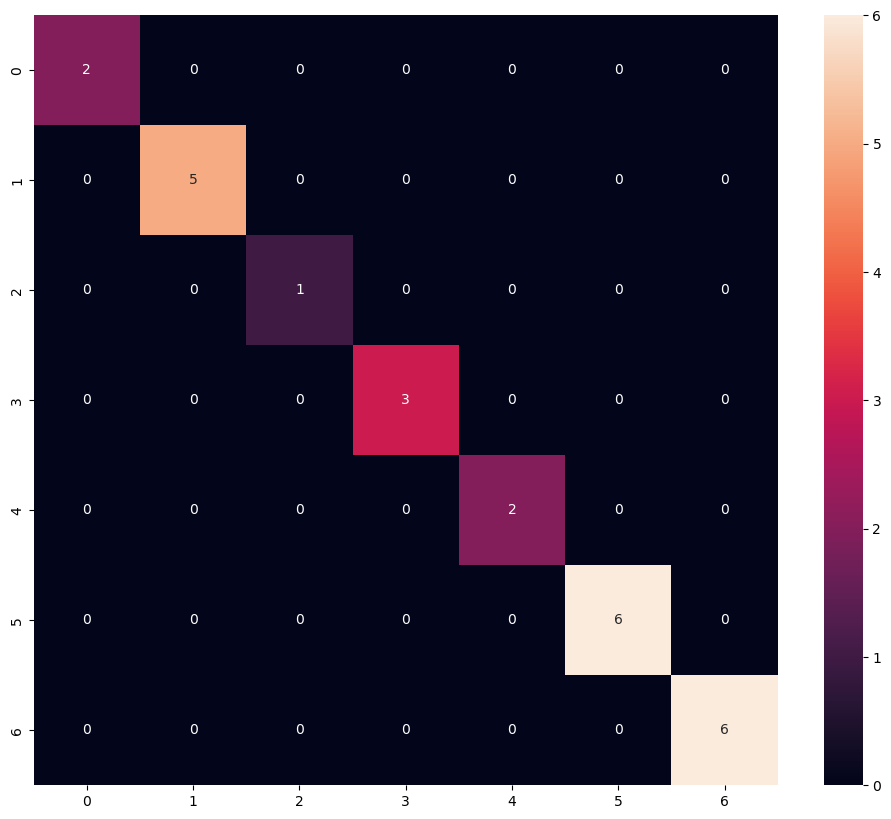

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_estimators':[100,150],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25],'class_weight':['balanced','balanced_subsample']}]
rfc = RandomForestClassifier(max_features='sqrt')
gscv = GridSearchCV(rfc,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: RandomForestClassifier(ccp_alpha=0, class_weight='balanced', max_depth=2,
                       max_features='sqrt')
Best Parameters: {'ccp_alpha': 0, 'class_weight': 'balanced', 'max_depth': 2, 'n_estimators': 100}
Best Score1.0


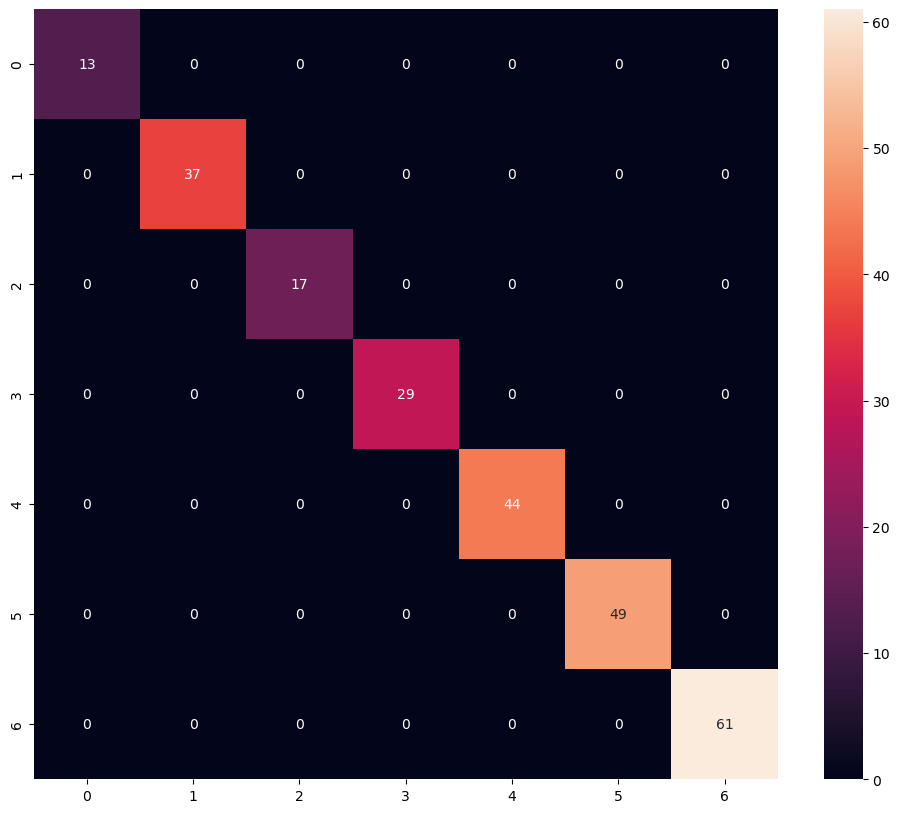

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_estimators':[100,150],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25],'class_weight':['balanced','balanced_subsample']}]
rfc = RandomForestClassifier(max_features='sqrt')
gscv = GridSearchCV(rfc,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))